This code takes the output tables from the code "calculate_carbon_sequestration_gee" and creates plots

In [10]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# load y2y carbon sequestration data
y2y_df = pd.read_csv('./outputs/y2y_carbon_sequestration.csv')
y2y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   system:index                                            1 non-null      int64  
 1   ID                                                      1 non-null      int64  
 2   Shape_Area                                              1 non-null      float64
 3   Shape_Leng                                              1 non-null      float64
 4   area                                                    1 non-null      float64
 5   area__ha                                                1 non-null      float64
 6   gfw_flux_model_extent__ha                               1 non-null      float64
 7   gfw_forest_carbon_annual_emission_rate_Mg(C)_ha-1_yr-1  1 non-null      float64
 8   gfw_forest_carbon_annual_netflux_rate_Mg(C)_

In [19]:
# filter df for annual emissions
y2y_emissions = y2y_df.filter(regex=r'gfw_forest_carbon_gross_emissions_\d{4}__Mg_C')
y2y_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   gfw_forest_carbon_gross_emissions_2001__Mg_C  1 non-null      float64
 1   gfw_forest_carbon_gross_emissions_2002__Mg_C  1 non-null      float64
 2   gfw_forest_carbon_gross_emissions_2003__Mg_C  1 non-null      float64
 3   gfw_forest_carbon_gross_emissions_2004__Mg_C  1 non-null      float64
 4   gfw_forest_carbon_gross_emissions_2005__Mg_C  1 non-null      float64
 5   gfw_forest_carbon_gross_emissions_2006__Mg_C  1 non-null      float64
 6   gfw_forest_carbon_gross_emissions_2007__Mg_C  1 non-null      float64
 7   gfw_forest_carbon_gross_emissions_2008__Mg_C  1 non-null      float64
 8   gfw_forest_carbon_gross_emissions_2009__Mg_C  1 non-null      float64
 9   gfw_forest_carbon_gross_emissions_2010__Mg_C  1 non-null      float64

In [20]:
# Rename columns to just the year
y2y_emissions = y2y_emissions.rename(columns=lambda x: x.split("_")[5] if "gfw_forest_carbon_gross_emissions_" in x else x)
y2y_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    1 non-null      float64
 1   2002    1 non-null      float64
 2   2003    1 non-null      float64
 3   2004    1 non-null      float64
 4   2005    1 non-null      float64
 5   2006    1 non-null      float64
 6   2007    1 non-null      float64
 7   2008    1 non-null      float64
 8   2009    1 non-null      float64
 9   2010    1 non-null      float64
 10  2011    1 non-null      float64
 11  2012    1 non-null      float64
 12  2013    1 non-null      float64
 13  2014    1 non-null      float64
 14  2015    1 non-null      float64
 15  2016    1 non-null      float64
 16  2017    1 non-null      float64
 17  2018    1 non-null      float64
 18  2019    1 non-null      float64
 19  2020    1 non-null      float64
 20  2021    1 non-null      float64
 21  2022    1 non-null      float64
 22  2023  

In [21]:
# Melt the DataFrame for plotting
y2y_emissions_melted = y2y_emissions.melt(var_name="Year", value_name="Emissions")

# Convert "Year" to an integer for proper ordering
y2y_emissions_melted["Year"] = y2y_emissions_melted["Year"].astype(int)

# divide emissions by 1e6 to get million tons
y2y_emissions_melted['Emissions'] = y2y_emissions_melted['Emissions'] / 1e6
y2y_emissions_melted

,Year,Emissions
0,2001,24.963182
1,2002,19.355440
2,2003,18.827630
3,2004,56.763692
4,2005,64.230629
5,2006,36.612287
6,2007,43.704559
7,2008,33.253530
8,2009,17.984099
9,2010,24.857498


In [56]:
# Compute a 3-year moving average
y2y_emissions_3yr = y2y_emissions_melted.groupby("Year", as_index=False)["Emissions"].mean()
y2y_emissions_3yr["Emissions"] = y2y_emissions_3yr["Emissions"].rolling(window=3, min_periods=1).mean()
y2y_emissions_3yr


,Year,Emissions
0,2001,24.963182
1,2002,22.159311
2,2003,21.048751
3,2004,31.648921
4,2005,46.607317
5,2006,52.535536
6,2007,48.182492
7,2008,37.856792
8,2009,31.647396
9,2010,25.365042


In [59]:
# create a df only 2015 onward
y2y_emissions_melted_2015 = y2y_emissions_melted.query('Year >= 2015')

In [30]:
# save annual average sequestration in million tons
mean_seques = y2y_df['gfw_forest_carbon_average_annual_removals__Mg(C)_yr-1'].values.item() / 1e6
mean_seques

61.12648062115146

In [43]:
# save annual average emissions in million tons
mean_emissions = y2y_df['gfw_forest_carbon_average_annual_emissions__Mg(C)_yr-1'].values.item() / 1e6
mean_emissions

36.186543192147184

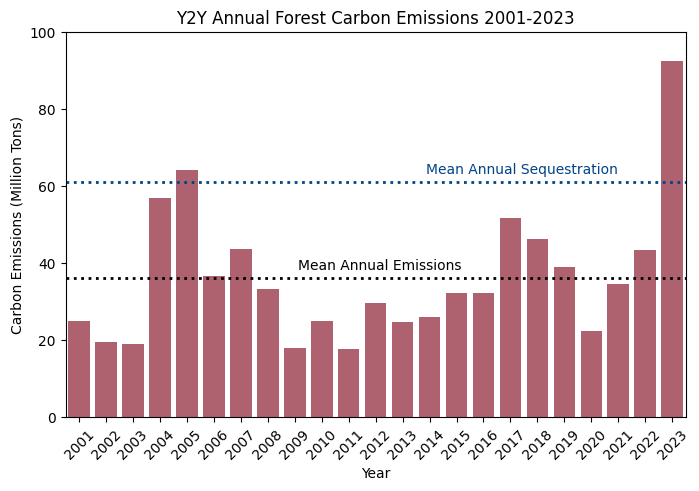

In [60]:
# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="Emissions", data=y2y_emissions_melted, estimator=sum, errorbar=None, color="#BB5566")

# Add a dotted line at mean removals
plt.axhline(y=mean_seques, color='#004488', linestyle='dotted', linewidth=2)

# Add a dotted line at mean emissions
plt.axhline(y=mean_emissions, color='#000000', linestyle='dotted', linewidth=2)

# add a label for mean removals
plt.text(x=20, y=mean_seques+2, s="Mean Annual Sequestration", color='#004488', fontsize=10, ha='right')

# add a label for mean emissions
plt.text(x=14.2, y=mean_emissions+2, s="Mean Annual Emissions", color='#000000', fontsize=10, ha='right')

# Customize plot
plt.xlabel("Year")
plt.ylabel("Carbon Emissions (Million Tons)")
plt.title("Y2Y Annual Forest Carbon Emissions 2001-2023")
plt.xticks(rotation=45)
plt.yticks([0, 20, 40, 60, 80, 100])
plt.show()

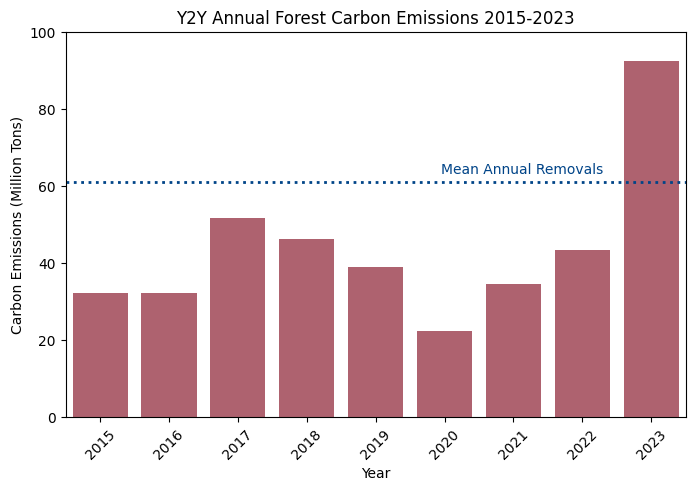

In [76]:
# Create a bar plot, only 2015 onward
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="Emissions", data=y2y_emissions_melted_2015, estimator=sum, errorbar=None, color="#BB5566")

# Add a dotted line at mean removals
plt.axhline(y=mean_seques, color='#004488', linestyle='dotted', linewidth=2)

# Add a dotted line at mean emissions
#plt.axhline(y=mean_emissions, color='#000000', linestyle='dotted', linewidth=2)

# add a label for mean removals
plt.text(x=7.3, y=mean_seques+2, s="Mean Annual Removals", color='#004488', fontsize=10, ha='right')

# add a label for mean emissions
#plt.text(x=6.8, y=mean_emissions+2, s="Mean Annual Emissions", color='#000000', fontsize=10, ha='right')

# Customize plot
plt.xlabel("Year")
plt.ylabel("Carbon Emissions (Million Tons)")
plt.title("Y2Y Annual Forest Carbon Emissions 2015-2023")
plt.xticks(rotation=45)
plt.yticks([0, 20, 40, 60, 80, 100])
plt.show()